Import Libraries

In [140]:
# importing libraries
import warnings 
warnings.filterwarnings("ignore")
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

# functions
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Loading Data

In [141]:
# Loading Data 
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.813068,183.697480,9812.122463,7.607639,400.373526,539.610797,12.348083,90.390277,4.713719,0
1,5.600877,183.573783,20411.664381,9.753766,336.404819,368.359984,11.095878,66.820124,4.362034,0
2,8.247148,175.911830,9913.963346,4.974506,324.433308,302.200496,11.070511,71.438165,3.941969,0
3,4.850104,186.676176,32808.307503,7.496263,293.757927,392.700493,10.630769,85.157983,3.885386,0
4,NaN,208.177464,17264.840917,3.296157,387.070824,631.304216,8.404570,68.300590,3.912148,0
...,...,...,...,...,...,...,...,...,...,...
2615,8.610963,125.158770,32079.774815,9.844921,264.052839,342.205252,12.947376,53.950269,4.614400,1
2616,10.272444,163.624623,18894.852394,10.068205,269.646656,446.450725,11.856914,82.445503,3.179885,1
2617,7.264069,216.622392,19412.112723,6.932458,NaN,301.953551,19.210991,67.712585,3.960282,1
2618,7.077874,220.670540,23873.378210,6.181840,341.987234,333.050786,10.661799,90.297770,4.764508,0


Data Exploration & Cleaning

In [142]:
# check how many rows and columns in the data set
df.shape  # rows, columns 

(2620, 10)

In [143]:
# data features, total tuples and data type those features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2236 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2007 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2493 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [144]:
# basic statistical information overview 
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2236.000000,2620.000000,2620.000000,2620.000000,2007.000000,2620.000000,2620.000000,2493.000000,2620.000000,2620.000000
mean,7.069157,196.408490,22108.509950,7.127405,333.406487,426.945574,14.290737,66.420731,3.964995,0.391985
std,1.597720,32.560996,8799.858175,1.568125,41.238327,81.107390,3.321269,16.081269,0.774964,0.488286
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.067862,176.778006,15701.988368,6.127421,307.543307,365.734414,12.077016,55.905770,3.441806,0.000000
50%,7.036565,196.799368,20921.203012,7.134488,332.766156,422.365170,14.244070,66.668576,3.958429,0.000000
75%,8.022345,216.576645,27407.711940,8.111471,358.645492,482.596349,16.496714,77.315300,4.499166,1.000000
max,14.000000,323.124000,56867.859236,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [145]:
# check for NAs 
df.isna().sum()


ph                 384
Hardness             0
Solids               0
Chloramines          0
Sulfate            613
Conductivity         0
Organic_carbon       0
Trihalomethanes    127
Turbidity            0
Potability           0
dtype: int64

We have missing values in ph, Sulfate, and Trihalomethanes. We can remove some of those after checking correlation with the target variable, in this case 'Potability'. 

Data Visualization

In [146]:
# check how much water is fit for drinking 
# pie chart
p_data = df.copy()
p_data.Potability = p_data.Potability.map({1:'Potable', 0:'Not Potable'})
p_data.Potability.head()
#px.pie(p_data, names = 'Poability', title="Distribution of Water Potability")

0    Not Potable
1    Not Potable
2    Not Potable
3    Not Potable
4    Not Potable
Name: Potability, dtype: object

<AxesSubplot: title={'center': 'Distribution of Water Potability'}, ylabel='Potability'>

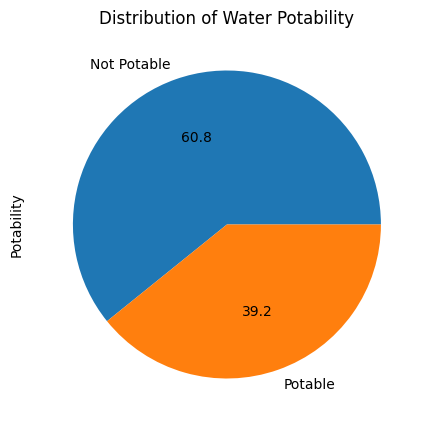

In [147]:
plt.figure(figsize=(15,5))
my_explode=[0,0] # seperation between the labels on the chart
my_labels = ['Not Potable','Potable']
df['Potability'].value_counts().plot(kind = 'pie', explode=my_explode, labels=my_labels, autopct='%.1f',
                                     title="Distribution of Water Potability")


About 61% of the sample is not potable. Let's look at the heatmap for correlation. 

<AxesSubplot: >

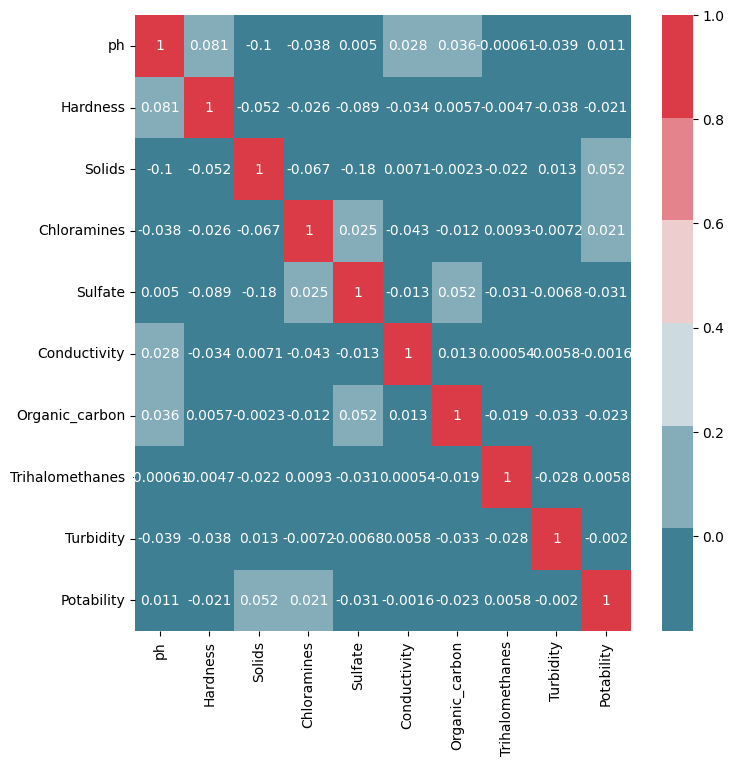

In [148]:
# Heat Map
from matplotlib.pyplot import annotate


plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(220,10)
sns.heatmap(df.corr(), annot=True, cmap=cmap)

No significant or high correlation or relation with 'Potability' is found, meaning 'Potability' simutaneously depends on all factors. So, we should not remove the variables/features with missing values, instead we should substitue with avg values? 

Let's look at Normal distribution and outliers in the data set first. 

In [149]:
# First we need to create a data frame
features = df.copy()
features.drop(columns=['Potability'], inplace=True)

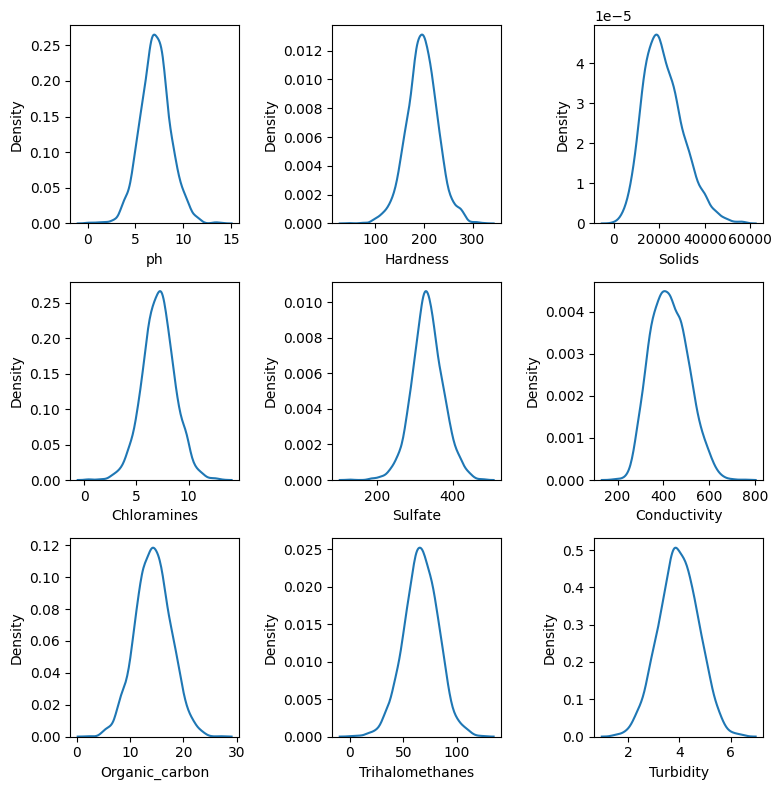

In [150]:
j = 1 
plt.figure(figsize=(8,8))
for i in features.columns:
    plt.subplot(3,3,j) # column, row, index 
    sns.kdeplot(features[i])
    j += 1
plt.tight_layout()

They all look normally distributed except from solid being a little right skewed. 

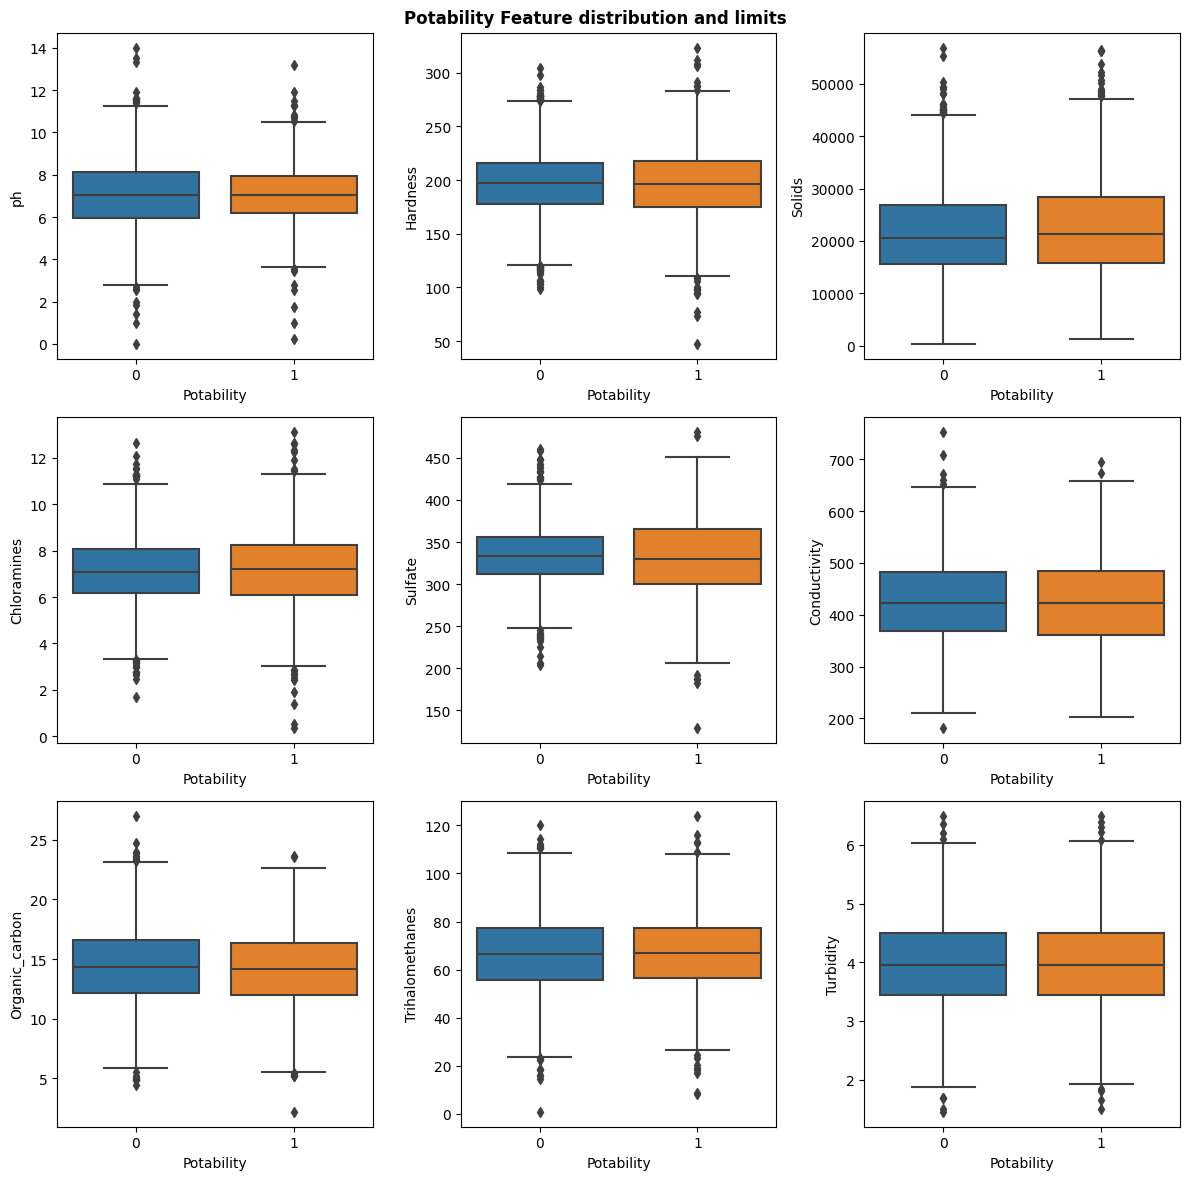

In [151]:
# Look at Outliers!!!!!!!!
j = 1 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
plt.suptitle("Potability Feature distribution and limits",weight='bold')
for i in features.columns: 
    plt.subplot(3,3,j)
    sns.boxplot(df, x='Potability', y = i)
    j += 1 
plt.tight_layout()

All the features have outliers, we can deal with them later. 

We can check pairwise plot as well.

In [152]:
sns.pairplot(df, hue = "Potability", palette= ['teal','coral'])

All sample are clustering around the center of the plots. A potable water sample has less feauters levels than not potable water. 

Now, we can deal with outliers. 

In [ ]:
print('Median ph', df['ph'].median(), '| Mean of ph', df['ph'].mean())
print('Median sulfate', df['Sulfate'].median(), '|Mean of Sulfate', df['Sulfate'].mean())
print('Median Trihalomethanes', df['Trihalomethanes'].median(), '|Mean of Trihalomethanes', df['Trihalomethanes'].mean())

Median ph 7.036564550374857 | Mean of ph 7.069156636905725
Median sulfate 332.7661559909496 |Mean of Sulfate 333.40648663163665
Median Trihalomethanes 66.66857615209304 |Mean of Trihalomethanes 66.42073079072107


In [ ]:
# Filling missing values with median of those values since they are almost the same. 
df1 = df.copy()

df1['ph'].fillna(df1['ph'].median(), inplace=True)
df1['Sulfate'].fillna(df1['Sulfate'].median(), inplace=True)
df1['Trihalomethanes'].fillna(df1['Trihalomethanes'].median(), inplace=True)

In [ ]:
df1.isna().sum() # final check

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Data is Cleaned! 

Now, let's test_split for Model building. 

In [ ]:
# sperating response variable from the data set 
X = df1.drop(columns= "Potability")
y = df1["Potability"]

In [ ]:
# Standardize the data set? 
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col = X.columns
X[col] = st.fit_transform(X[col])
X[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.507340,-0.390450,-1.397606,0.306306,1.859960,1.389352,-0.585025,1.527552,0.966326
1,-0.991726,-0.394250,-0.192863,1.675161,0.087242,-0.722459,-0.962123,0.024700,0.512430
2,0.801489,-0.629605,-1.386031,-1.373174,-0.244515,-1.538317,-0.969762,0.319150,-0.029718
3,-1.500478,-0.298952,1.216138,0.235267,-1.094599,-0.422300,-1.102189,1.193936,-0.102746
4,-0.018849,0.361513,-0.550531,-2.443669,1.491312,2.520087,-1.772603,0.119095,-0.068205
...,...,...,...,...,...,...,...,...,...
2615,1.048024,-2.188610,1.133333,1.733302,-1.917794,-1.044991,-0.404549,-0.795893,0.838142
2616,2.173908,-1.007037,-0.365264,1.875719,-1.762777,0.240531,-0.732939,1.020986,-1.013286
2617,0.135317,0.620920,-0.306472,-0.124342,-0.013593,-1.541362,1.481721,0.081604,-0.006082
2618,0.009144,0.745268,0.200595,-0.603106,0.241944,-1.157881,-1.092845,1.521653,1.031876


In [ ]:
# train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Model Building

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.5816793893129771

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test) 
accuracy_score(y_test,y_pred)

0.6290076335877862

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test) 
accuracy_score(y_test,y_pred)

0.667175572519084

Try CV and K-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold

models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('RFC',RandomForestClassifier()))

#Evaluation of models
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10) #random_state=1
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR: 0.606612 (0.009516)
DT: 0.561320 (0.024754)
KNN: 0.631034 (0.024014)
RFC: 0.659523 (0.020715)


In [ ]:
rfc = RandomForestClassifier(random_state=1)
rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.667175572519084


Accuracy stays the same even after cv and kfold trials. So, the best we can do here is 66.7% using Random Forest Classifier model. 

We can use confusion matrix at last to visualize the performance of our algorithm. 